In [1]:

from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
import sklearn
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter("ignore")
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [86]:

data = pd.read_csv('/content/drive/MyDrive/GNN/disease/dataset.csv')
data.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data.Disease.value_counts()


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [88]:
data.shape


(4920, 18)

In [89]:
data.groupby('Disease').Symptom_1.count()


Disease
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C                                120
Hepat

In [90]:
data.Disease.nunique()


41

In [91]:
data.fillna(0, inplace = True)


In [92]:
train, test = train_test_split(data, test_size = 0.2, random_state = 1)
train

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4444,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,0,0,0,0,0,0
45,Drug Reaction,skin_rash,stomach_pain,burning_micturition,spotting_ urination,0,0,0,0,0,0,0,0,0,0,0,0,0
3393,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,depression,irritability,abnormal_menstruation,0,0,0,0
3157,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
3343,Hepatitis D,joint_pain,vomiting,fatigue,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,Tuberculosis,chills,vomiting,fatigue,weight_loss,cough,high_fever,breathlessness,sweating,loss_of_appetite,mild_fever,yellowing_of_eyes,swelled_lymph_nodes,malaise,phlegm,chest_pain,blood_in_sputum,0
2763,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,0,0,0,0,0,0
905,Gastroenteritis,vomiting,sunken_eyes,dehydration,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3980,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,0,0,0,0,0,0,0,0,0,0


In [93]:

le = LabelEncoder()
train['Disease'] = le.fit_transform(train['Disease'])
test['Disease'] = le.transform(test['Disease'])

In [94]:
train['Disease']

4444     8
45      14
3393    26
3157    15
3343    21
        ..
2895    36
2763     8
905     17
3980     9
235     22
Name: Disease, Length: 3936, dtype: int64

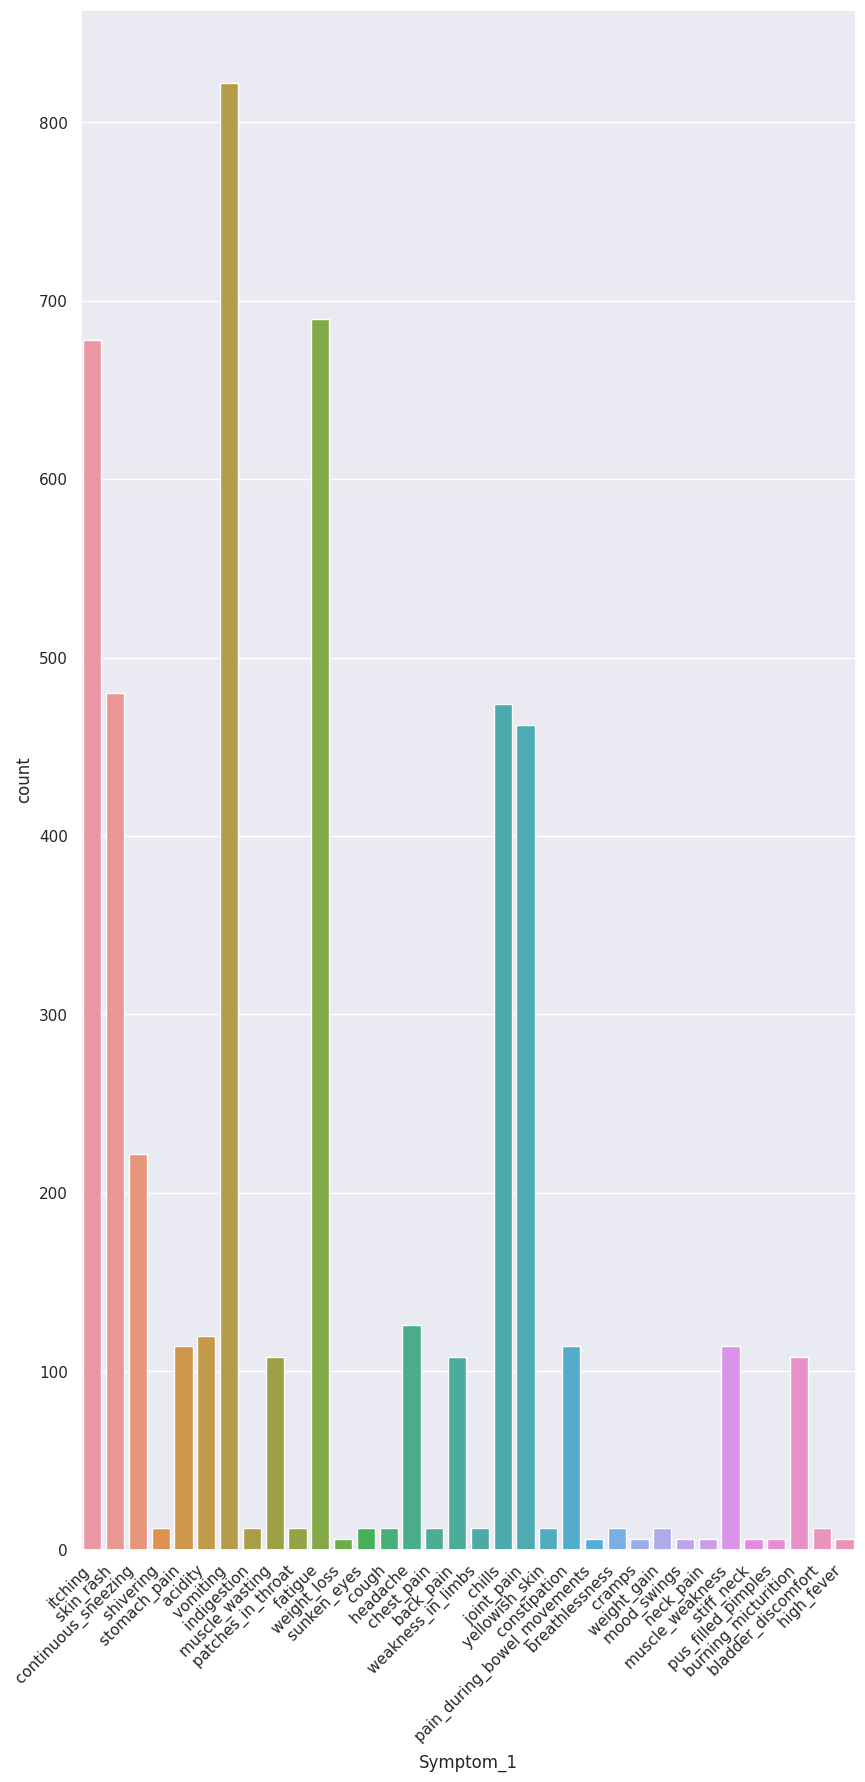

In [95]:

sns.countplot(data=data,x='Symptom_1')
plt.xticks(rotation=45, ha='right')
plt.show()

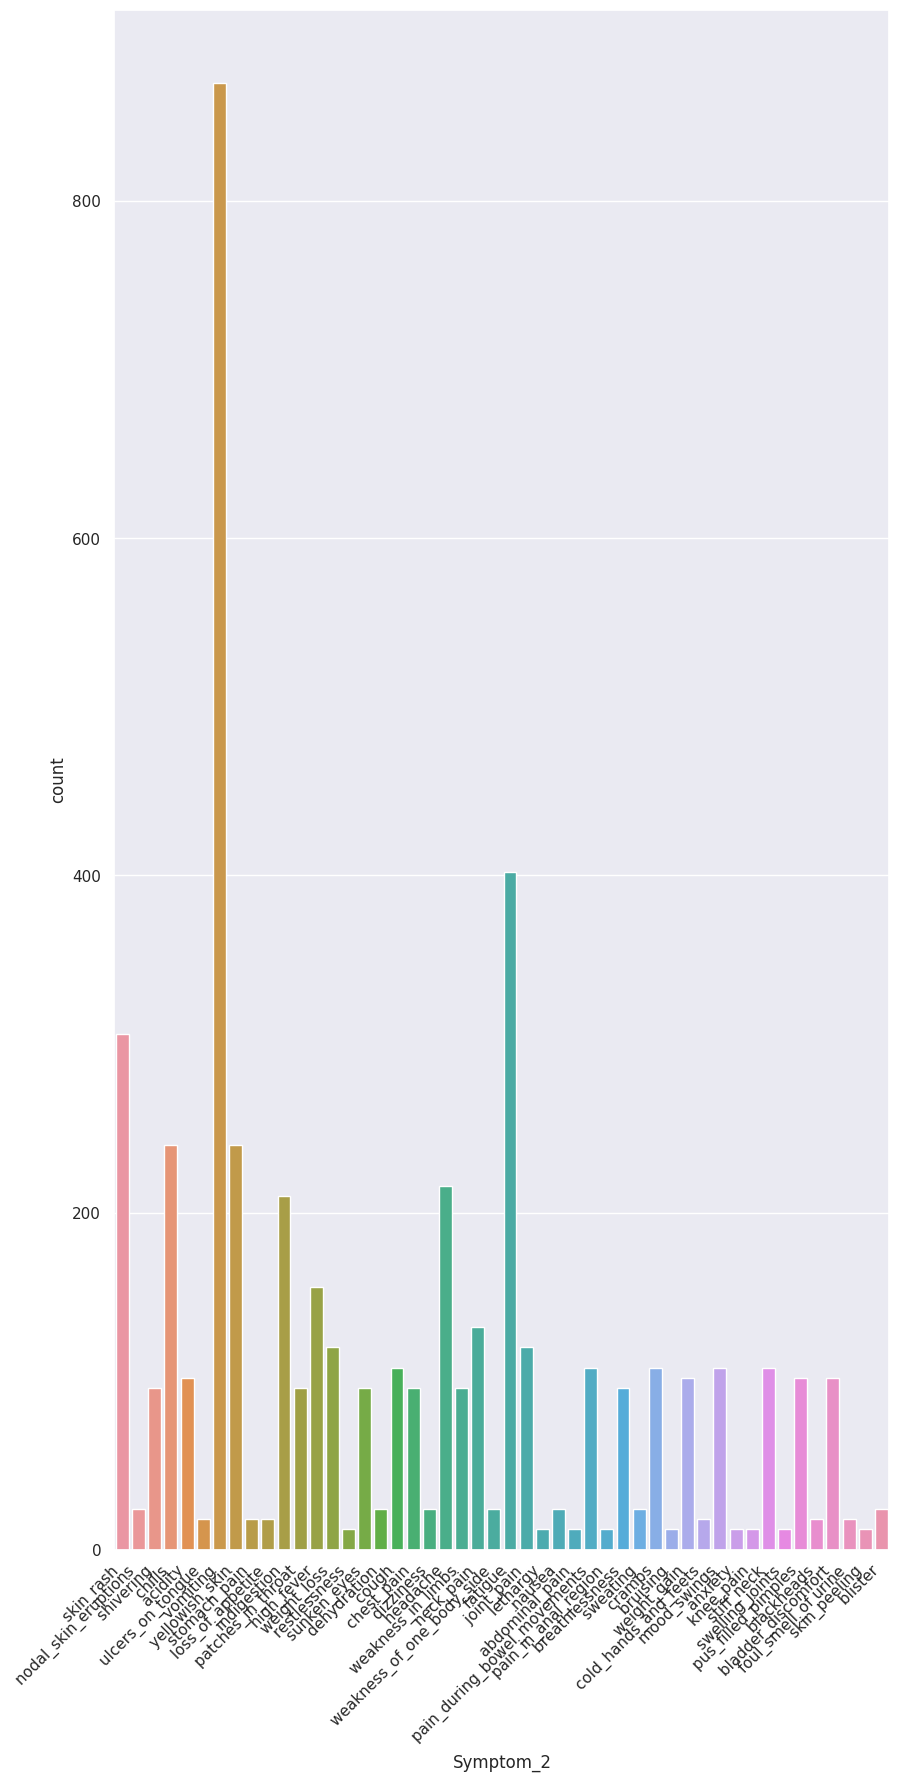

In [96]:
sns.countplot(data=data,x='Symptom_2')
plt.xticks(rotation=45, ha='right')
plt.show()

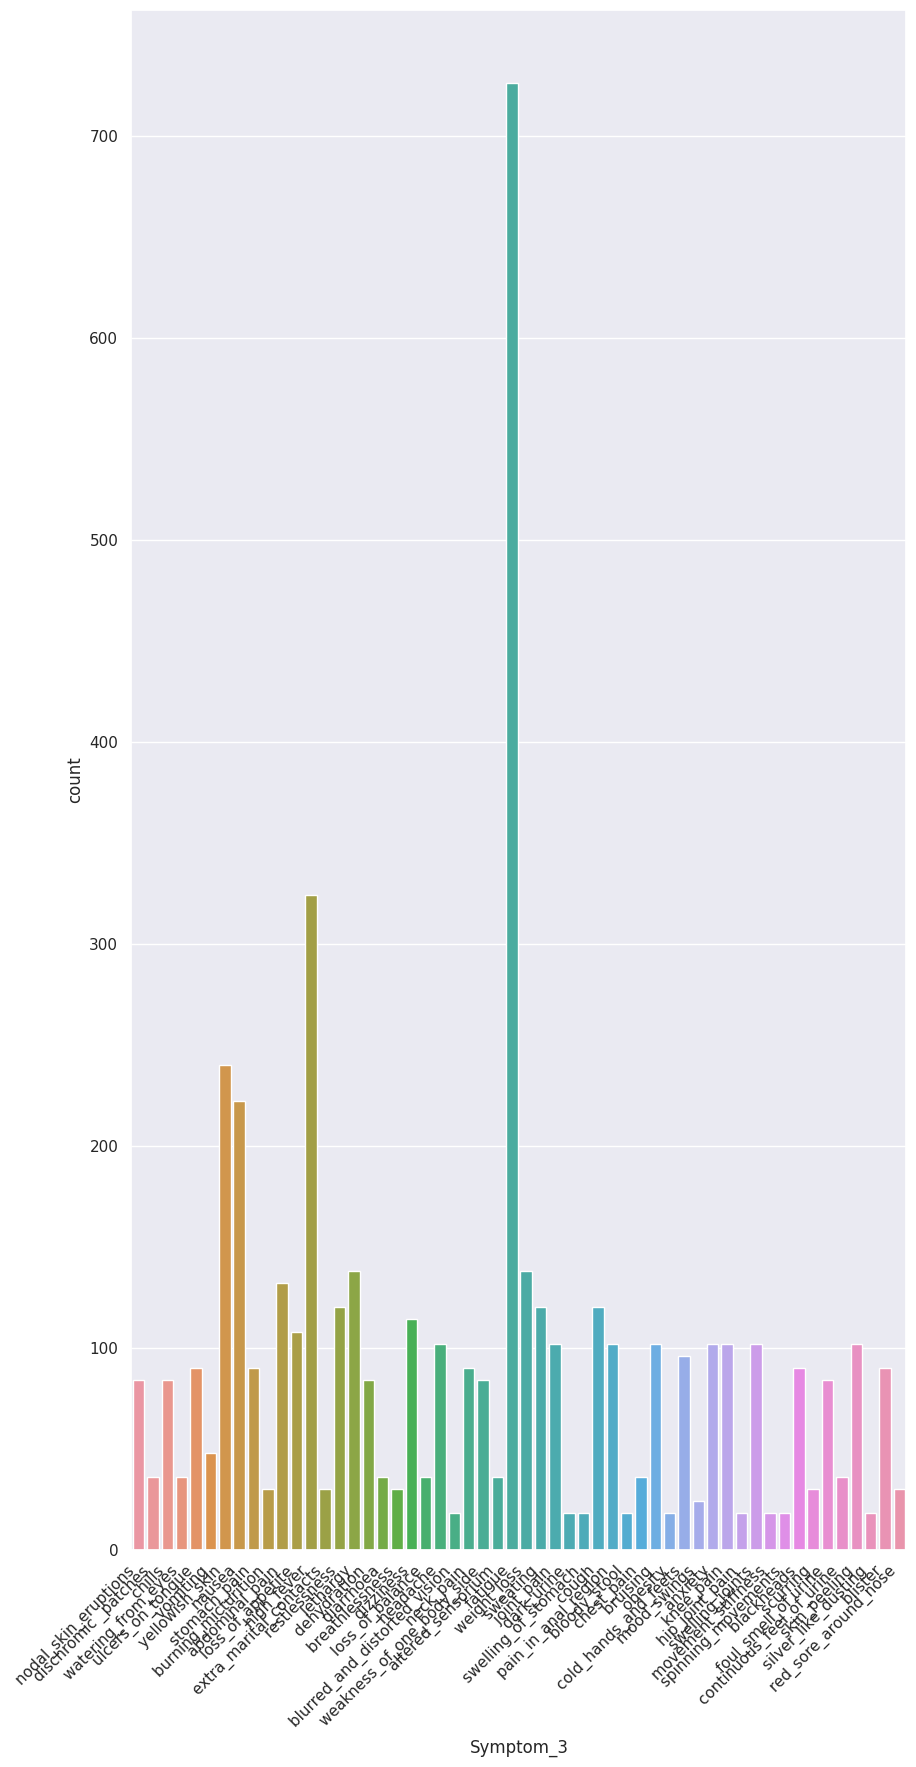

In [97]:
sns.countplot(data=data,x='Symptom_3')
plt.xticks(rotation=45, ha='right')
plt.show()

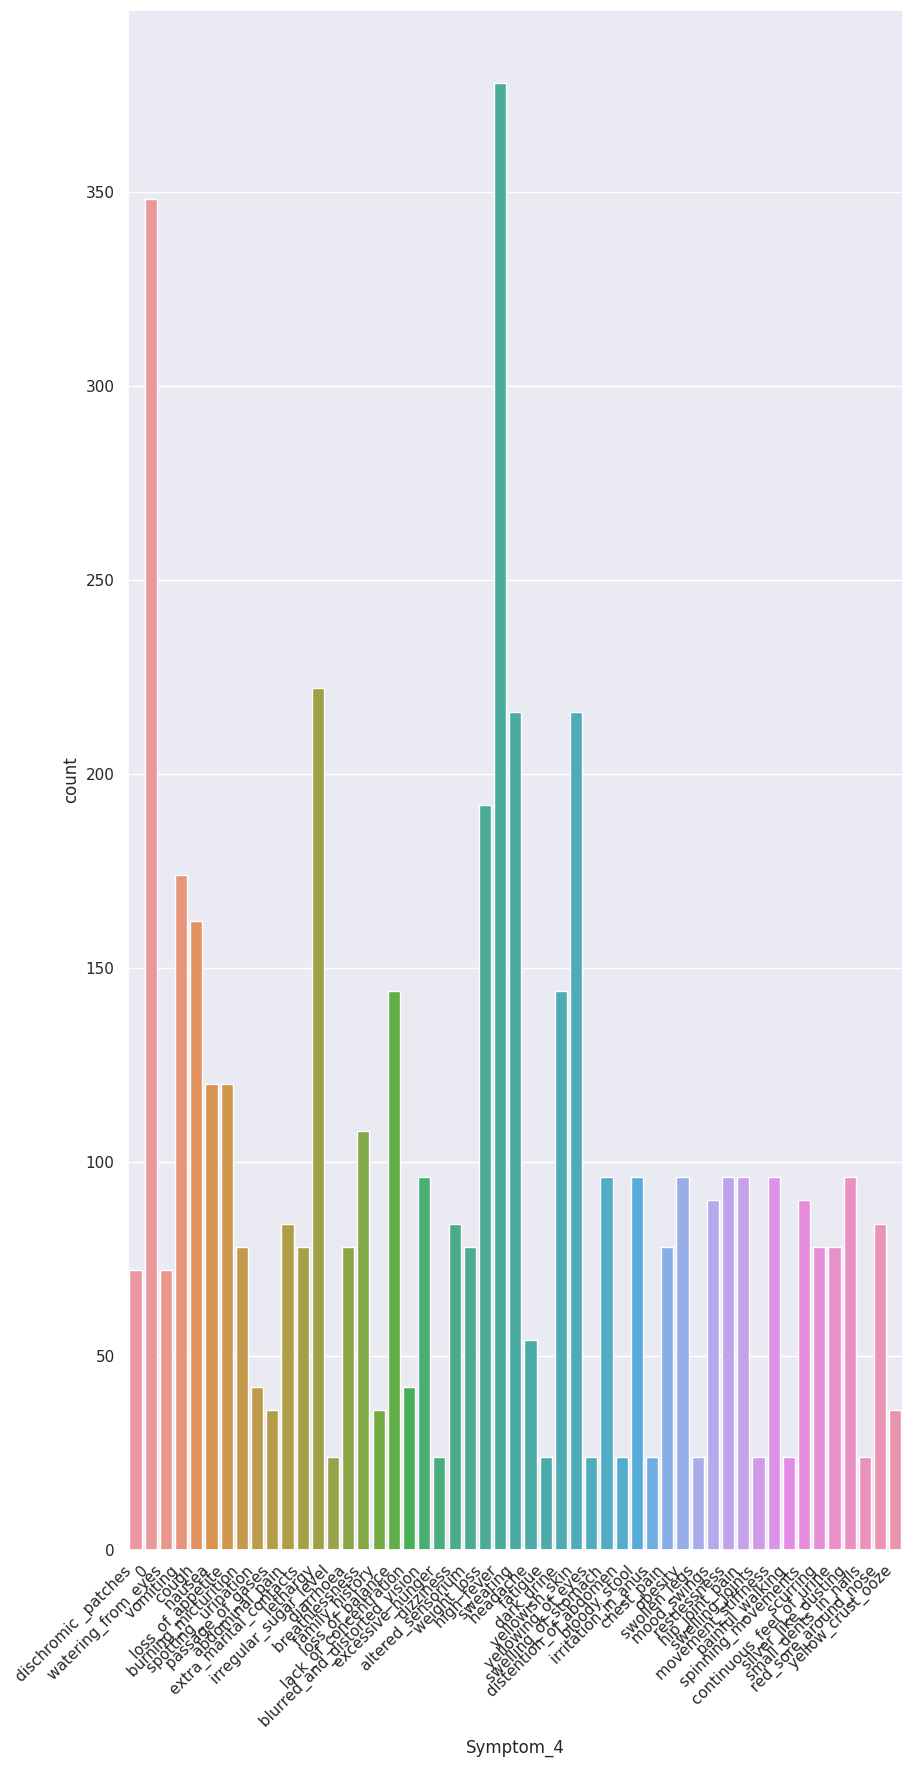

In [98]:
sns.countplot(data=data,x='Symptom_4')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: xlabel='Disease'>

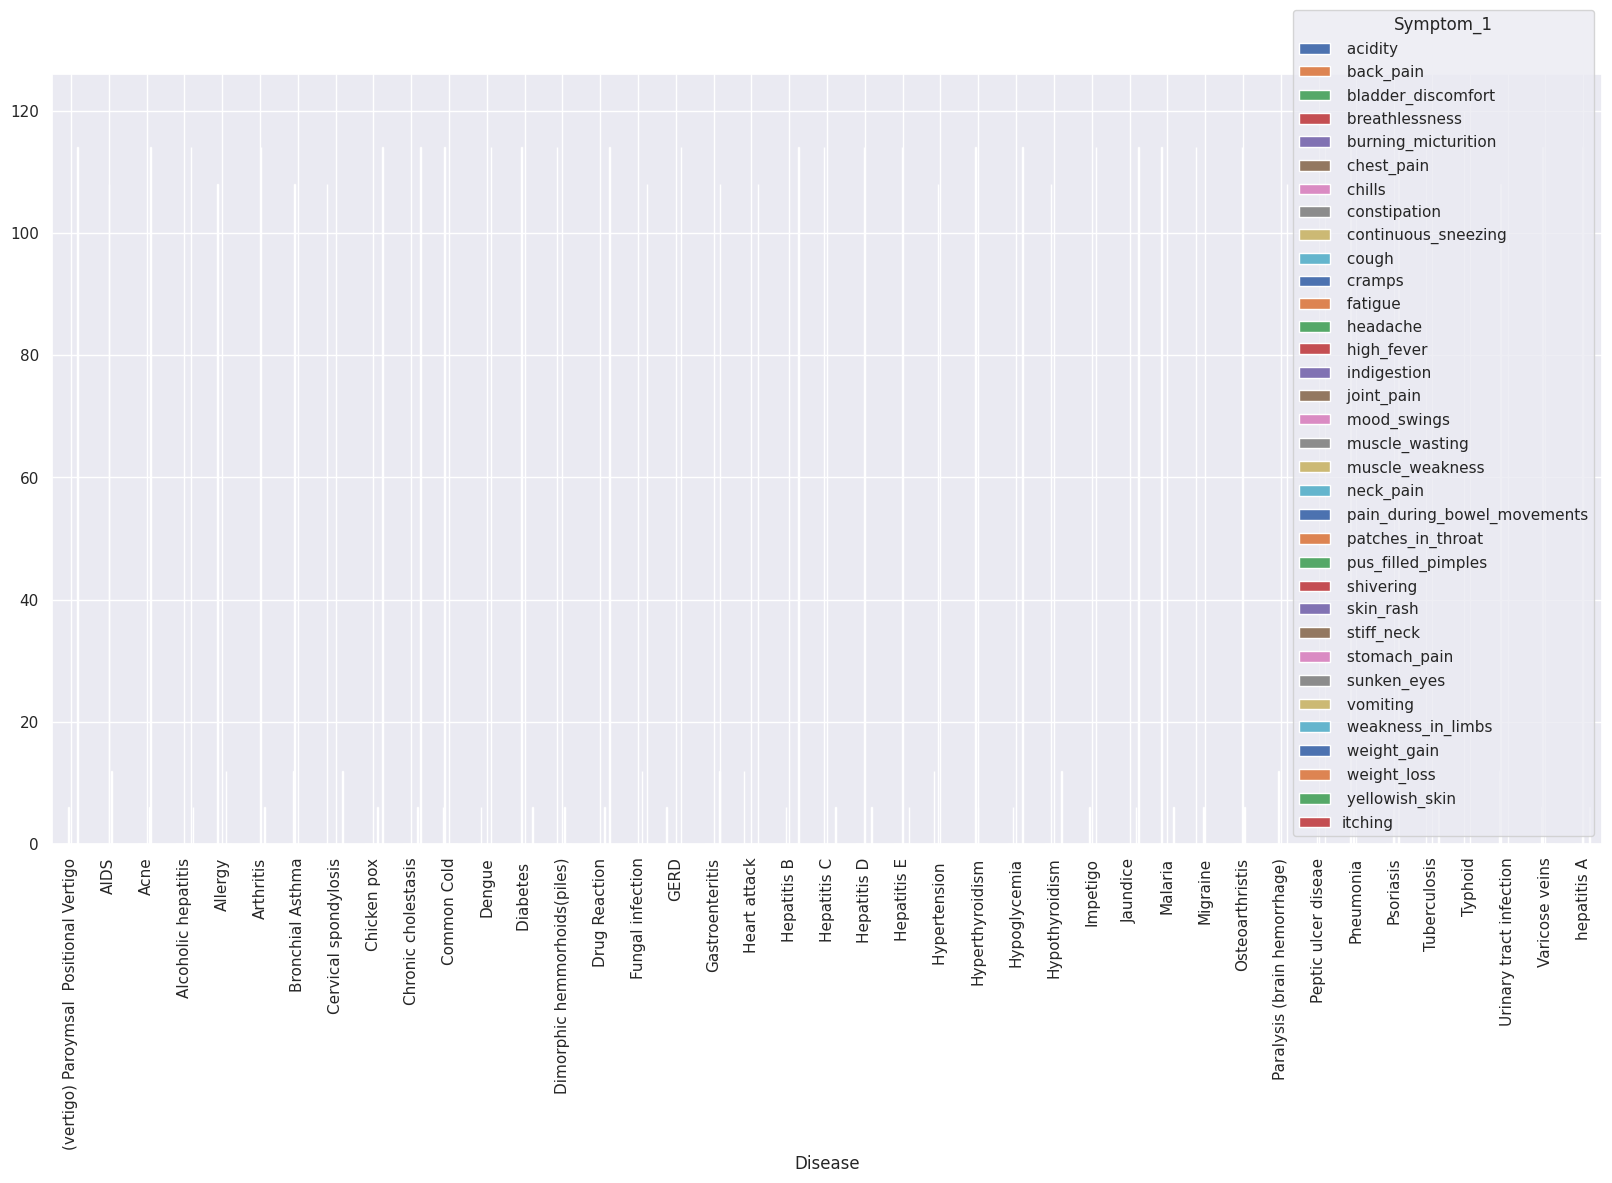

In [99]:
pd.crosstab(data['Disease'], data['Symptom_1']).plot.bar(figsize = (20,10))


<Axes: xlabel='Disease'>

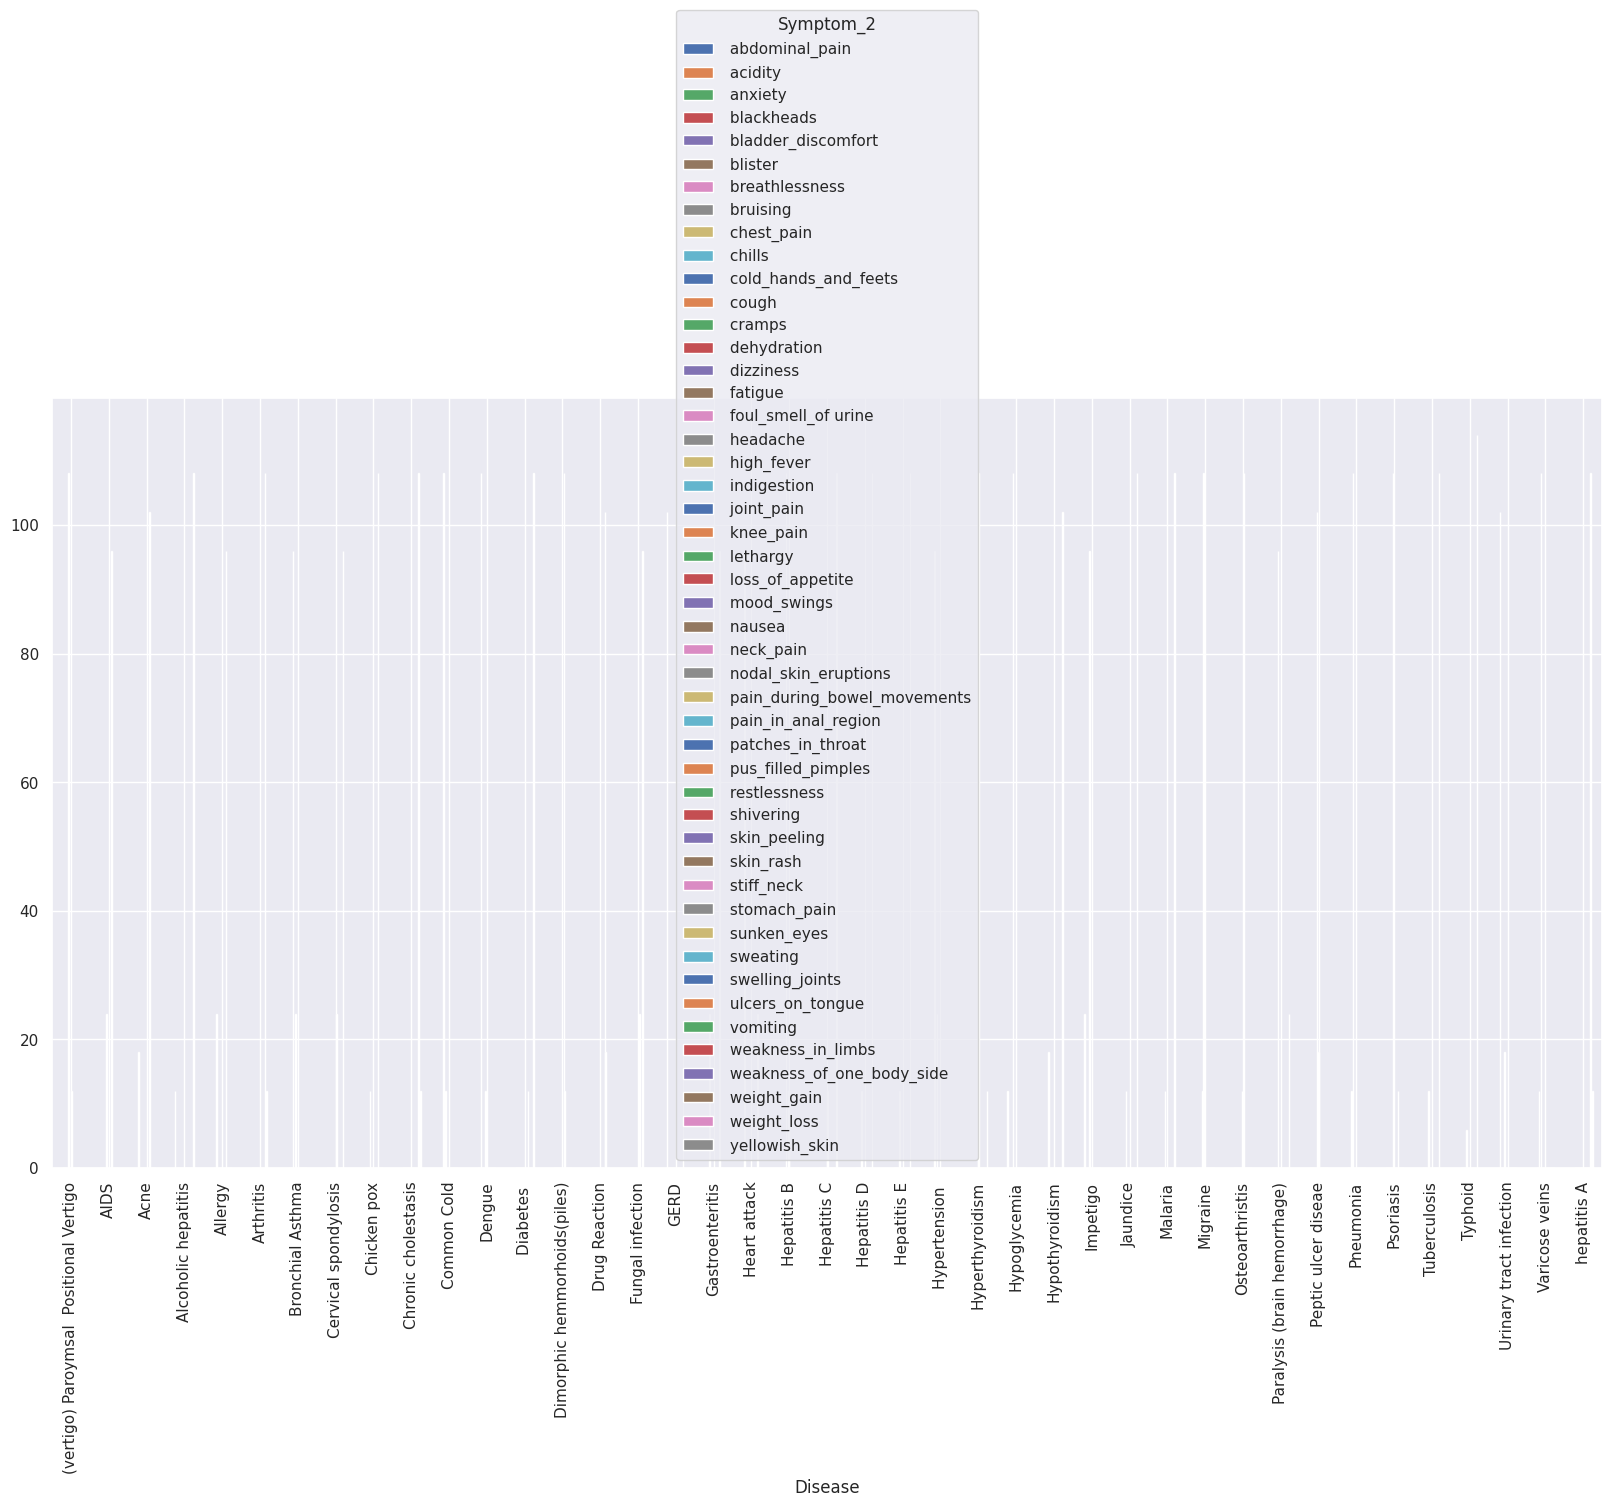

In [100]:
pd.crosstab(data['Disease'], data['Symptom_2']).plot.bar(figsize = (20,10))


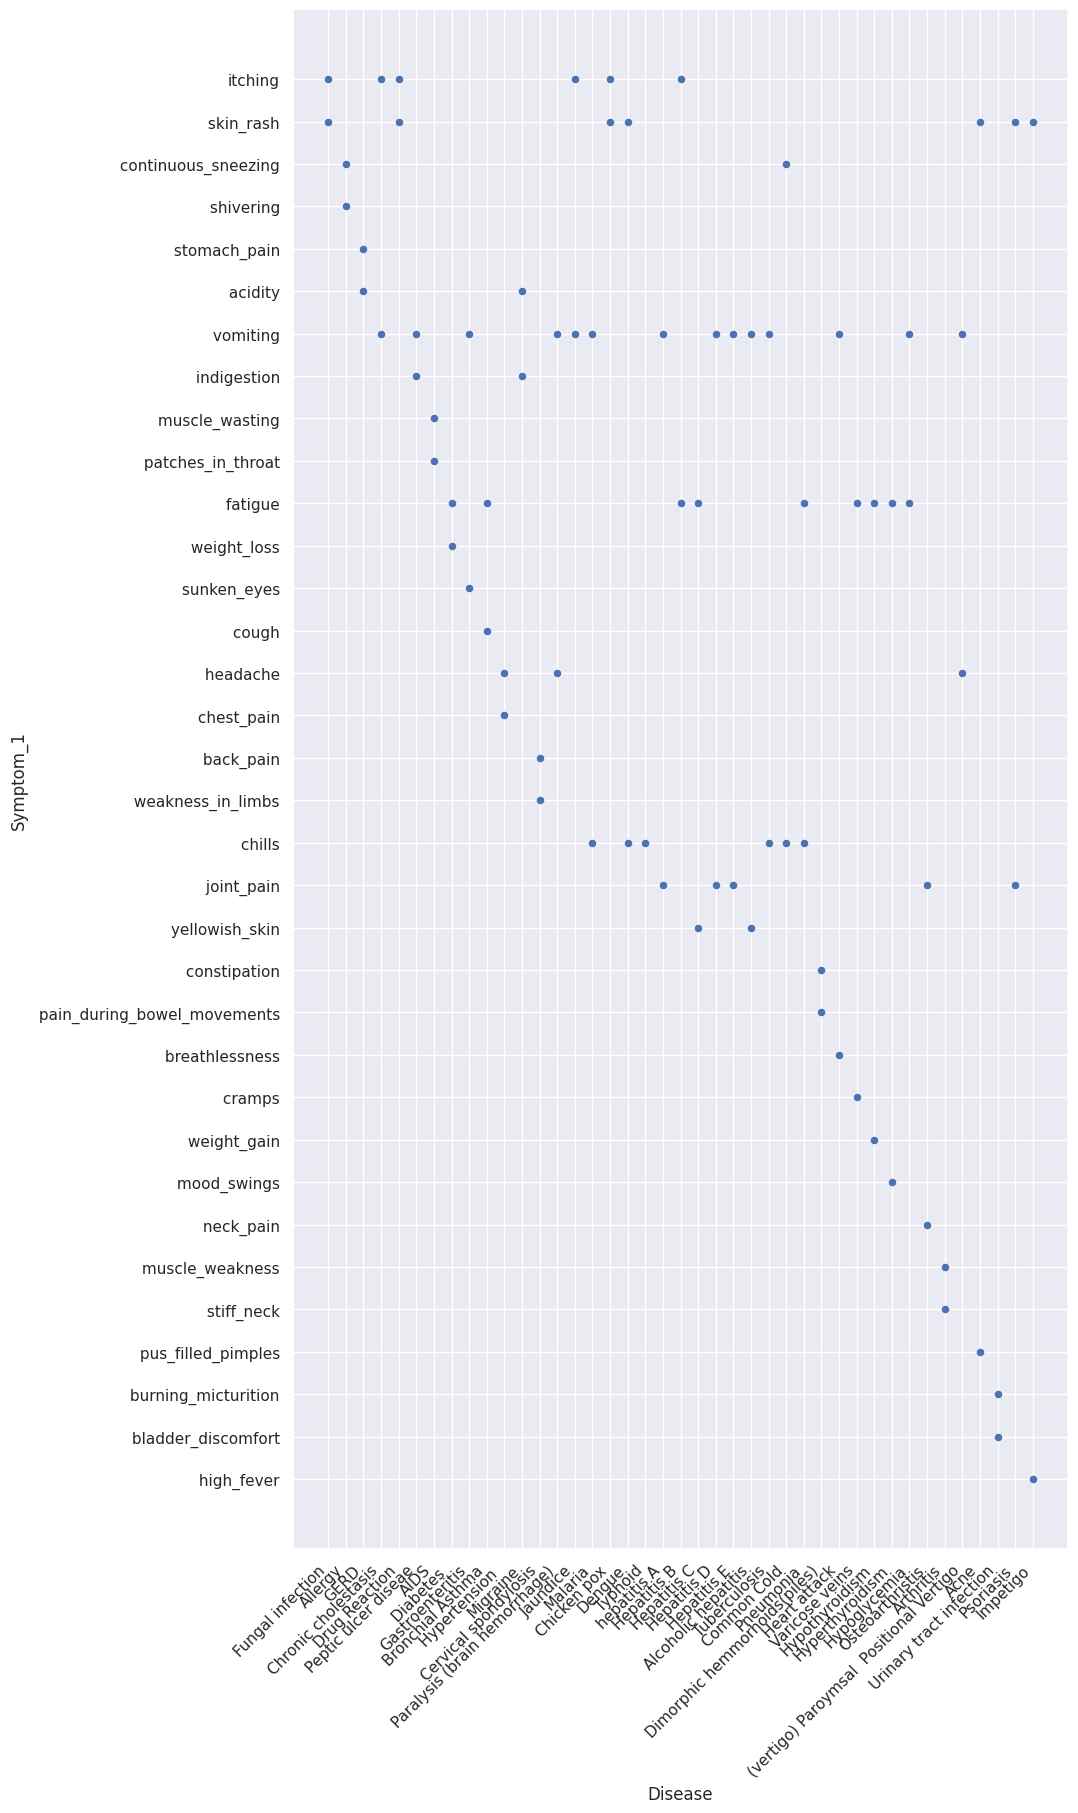

In [101]:

sns.scatterplot(data = data, x = 'Disease', y = 'Symptom_1')
sns.set(rc={'figure.figsize':(10, 20)})
plt.xticks(rotation=45, ha='right')
plt.show()

# Trọng số từng triệu chưgs

In [102]:
weight = pd.read_csv('/content/drive/MyDrive/GNN/disease/Symptom-severity.csv')
weight.head(10)


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
5,chills,3
6,joint_pain,3
7,stomach_pain,5
8,acidity,3
9,ulcers_on_tongue,4


array([[<Axes: title={'center': 'weight'}>]], dtype=object)

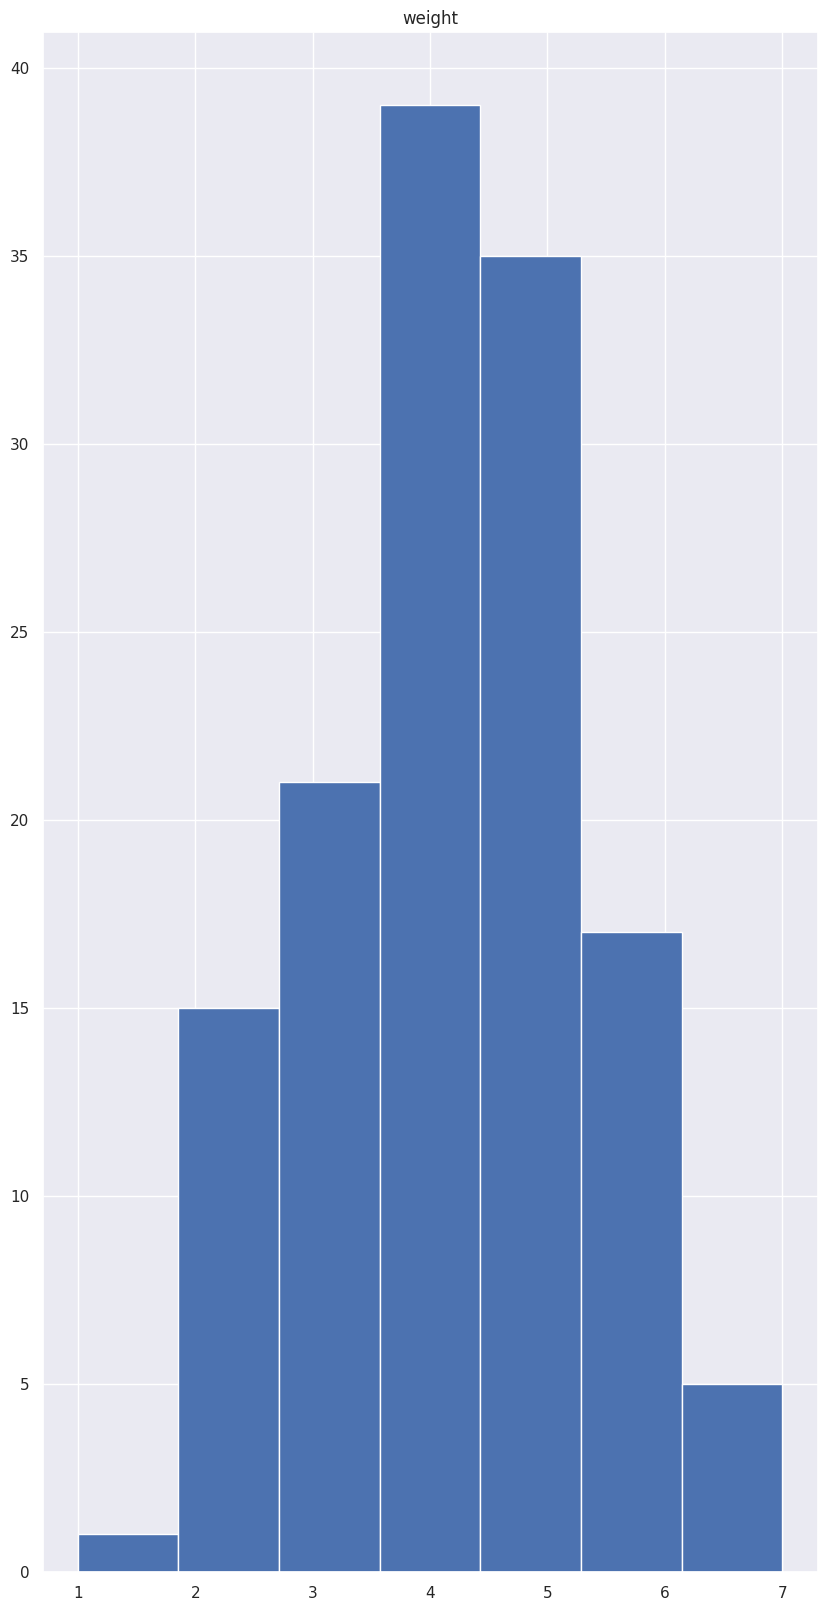

In [103]:
weight.hist(bins = 7)


In [104]:
weight.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [105]:
weight.Symptom = weight.Symptom.astype(str)


In [106]:
weight.shape


(133, 2)

# Strategy 1

Mỗi bệnh dùng 10 triệu chứng đầu để huấn luyện mô hình

In [107]:
def create_data(data):
  symtomp = [f'Symptom_{i}' for i in range(1,11)]
  X = data[symtomp]
  y = data[['Disease']]

  for col in symtomp:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

  return X, y

X_train, y_train = create_data(train)
X_test, y_test = create_data(test)

In [108]:
X_train.shape

(3936, 10)

In [109]:
X_train.head(10)


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
4444,33,35,21,24,13,12,13,11,16,7
45,24,37,9,39,38,32,26,21,22,21
3393,11,45,12,27,20,8,21,5,1,17
3157,33,35,35,11,38,32,26,21,22,21
3343,15,42,21,49,5,20,13,0,21,21
1620,24,20,42,36,27,15,26,21,22,21
1540,11,45,12,27,20,8,21,5,1,17
4859,11,47,33,25,36,9,26,21,22,21
4455,6,15,14,19,2,26,14,15,2,5
216,11,47,33,25,10,32,26,21,22,21


In [27]:
!pip install xgboost


In [28]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.48      1.00      0.65        23
           2       1.00      0.22      0.36        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      0.82      0.90        22
           6       1.00      1.00      1.00        22
           7       0.35      0.89      0.50        27
           8       1.00      0.40      0.57        20
           9       1.00      0.95      0.97        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      0.10      0.17        21
          15       0.40      0.11      0.17        18
          16       1.00      1.00      1.00        23
          17       1.00    

In [110]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return data

new_df = remove_space_between_word(data)

In [111]:
weights = weight.set_index('Symptom')['weight'].to_dict()


In [112]:

def enc(dataset):
    le = LabelEncoder()
    dataset.Disease = le.fit_transform(dataset.Disease)
    dataset = dataset.replace(weights)
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    return dataset
df = enc(new_df)
df.head(10)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,15,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,15,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,15,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,15,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,15,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0


# Strategy 2

In [113]:
data["Symptoms"] = 0
records = data.shape[0]
for i in range(records):
    values = data.iloc[i].values
    values = values.tolist()
    if 0 in values:
        data["Symptoms"][i] = values[1:values.index(0)]
    else:
        data["Symptoms"][i] = values[1:]


In [114]:
symps = weight['Symptom'].unique().tolist()
symptoms = pd.DataFrame(columns = symps,index = data.index)
symptoms["Symptoms"] = data["Symptoms"]
for i in symps:
    symptoms[i] = symptoms.apply(lambda x:1 if i in x.Symptoms else 0, axis=1)

In [115]:
symptoms["Disease"] = data["Disease"]
symptoms = symptoms.drop("Symptoms",axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(symptoms.drop('Disease', axis = 1), symptoms['Disease'], test_size = 0.2, random_state = 1)


In [36]:

rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train,y_train)
y_pred = rnd_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        23
          17       1.00    

In [116]:

feature_names = set(df.columns[2:])
num_features = len(feature_names)
num_classes = y_train.nunique()

hidden_units = [64, 32]
learning_rate = 0.01
dropout_rate = 0.1
num_epochs = 300
batch_size = 256

In [117]:
df.reset_index(inplace = True)


In [118]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1)


In [119]:

def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []
    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)


In [120]:

class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="attention",
        combination_type="gated",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gru":
            self.update_fn = layers.GRU(
                units=hidden_units[-1],
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_sequences=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)
        self.dense_q = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.dense_v = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.dense_k = tf.keras.layers.Dense(units=hidden_units[-1], activation=tf.keras.layers.LeakyReLU(alpha=0.01))
        self.multi_attention = tf.keras.layers.MultiHeadAttention(
              num_heads = 4, key_dim = 32, dropout= 0.1
          )
    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "attention":

          queries = self.dense_q(node_repesentations)
          values = self.dense_v(neighbour_messages)

          aggregated_message = tf.keras.layers.Attention(
              dropout= 0.1
          )([queries, values])

        elif self.aggregation_type == "multi_attention":

          queries = self.dense_q(node_repesentations)
          values = self.dense_v(neighbour_messages)
          keys = self.dense_k(neighbour_messages)
          q = tf.expand_dims(queries, axis=0)
          k = tf.expand_dims(keys, axis=0)
          v = tf.expand_dims(values, axis=0)
          aggregated_message = self.multi_attention(query = q, value = v, key = k)
          aggregated_message = tf.squeeze(aggregated_message)
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")
        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [121]:

class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="mean",
        combination_type="gru",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes,activation = 'softmax', name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [122]:

def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=20, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [123]:

import pandas as pd
from itertools import combinations

def create_group(feature, df, id):
  #df: Dataframe; feature: truong dung de group by

  # Groupby 'class_id' và tạo dataframe mới từ cặp chỉ số
  grouped = df.groupby(feature)[id].apply(list)

  # Tạo set để theo dõi các cặp chỉ số đã xuất hiện
  seen_pairs = set()

  # Tạo dataframe mới từ danh sách các cặp chỉ số và áp dụng điều kiện
  df_new = pd.DataFrame(columns=['index source', 'index target'])
  for indices in grouped.values:
      pairs = list(combinations(indices, 2))
      for pair in pairs:
          index_source, index_target = pair
          if index_source != index_target:
              sorted_pair = tuple(sorted(pair))
              if sorted_pair not in seen_pairs:
                  seen_pairs.add(sorted_pair)
                  df_new = df_new.append({'index source': index_source, 'index target': index_target}, ignore_index=True)

  # Hiển thị dataframe mới
  return df_new

# df_new = create_group('Disease', train, 'index')
# df_new.to_csv('egde_user_user.csv', index = False)

In [124]:
df_new = pd.read_csv('/content/egde_user_user.csv')
df_new.head(10)

,index source,index target
0,2000,4013
1,2000,773
2,2000,362
3,2000,3685
4,2000,3644
5,2000,3767
6,2000,4546
7,2000,367
8,2000,3111
9,2000,2742


In [125]:
def create_graph_info(df_edge, df_feature):
  # Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
  edges = df_edge[['index source', 'index target']].to_numpy().T
  # Create an edge weights array of ones.
  edge_weights = tf.ones(shape=edges.shape[1])
  # Create a node features array of shape [num_nodes, num_features].
  node_features = tf.cast(
      df_feature[feature_names].to_numpy(), dtype=tf.dtypes.float32
  )
  # Create graph info tuple with node_features, edges, and edge_weights.
  graph_info = (node_features, np.asarray(edges).astype('int32'), edge_weights)

  print("Edges shape:", edges.shape)
  print("Nodes shape:", node_features.shape)
  return graph_info


In [126]:
### Plot train and validation curves
def plot(historys):
  history = historys.history
  loss = history['loss']
  v_loss = history['val_loss']

  acc = history['acc']
  v_acc = history['val_acc']

  epochs = range(len(loss))

  fig = plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.yscale('log')
  plt.plot(epochs, loss, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Loss')
  plt.plot(epochs, v_loss, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Loss')
  # plt.ylim(0.3, 100)
  plt.xlabel('Epochs', fontsize=11)
  plt.ylabel('Loss', fontsize=12)
  plt.legend(fontsize=12)
  plt.subplot(1, 3, 2)
  plt.plot(epochs, acc, linestyle='--', linewidth=3, color='orange', alpha=0.7, label='Train Acc')
  plt.plot(epochs, v_acc, linestyle='-.', linewidth=2, color='lime', alpha=0.8, label='Valid Acc')
  plt.xlabel('Epochs', fontsize=11)
  plt.ylabel('Accuracy', fontsize=12)

  plt.legend(fontsize=12)
  plt.tight_layout()
  plt.show()

# Strategy 1: User and User

In [127]:
graph_info = create_graph_info(df_new, df)


Edges shape: (2, 187262)
Nodes shape: (4920, 16)


In [128]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[0.02446737 0.02268973 0.02141699 0.02470642 0.0241987  0.02647363
  0.02436801 0.02376984 0.02199912 0.0254692  0.02407684 0.02398218
  0.02674655 0.02293176 0.02560441 0.02440039 0.02744246 0.02308736
  0.02423389 0.02530393 0.02536998 0.02537508 0.02335488 0.0229847
  0.02349494 0.02594034 0.02381265 0.0229418  0.02429811 0.02285796
  0.0241207  0.02310106 0.0244117  0.02446468 0.024057   0.02570018
  0.02613507 0.02805691 0.02547659 0.02367786 0.022999  ]
 [0.02333642 0.02336828 0.0206732  0.0232727  0.02450515 0.02972879
  0.02402451 0.02267845 0.02270354 0.02463041 0.02590413 0.0212315
  0.0264752  0.02391285 0.02307164 0.02576825 0.02255495 0.02197297
  0.02816098 0.02544551 0.02507423 0.02624717 0.02483363 0.02008928
  0.02658384 0.03041459 0.02017872 0.01968959 0.02124189 0.02538349
  0.02187704 0.02107628 0.02676107 0.02104288 0.02515223 0.03353984
  0.02429348 0.02739753 0.02720065 0.02383766 0.02466545]
 [0.02628199 0.0226353  0.02054356 0.0275

In [50]:
x_train = train.index.to_numpy()
history1 = run_experiment(gnn_model, x_train, train.Disease)

Epoch 1/300
14/14 [==============================] - 21s 158ms/step - loss: 2.5899 - acc: 0.3118 - val_loss: 4.2745 - val_acc: 0.0457
Epoch 2/300
14/14 [==============================] - 1s 77ms/step - loss: 1.2769 - acc: 0.6030 - val_loss: 4.8825 - val_acc: 0.0829
Epoch 3/300
14/14 [==============================] - 1s 77ms/step - loss: 0.9281 - acc: 0.7109 - val_loss: 5.2081 - val_acc: 0.1100
Epoch 4/300
14/14 [==============================] - 1s 78ms/step - loss: 0.8493 - acc: 0.7321 - val_loss: 5.4684 - val_acc: 0.1506
Epoch 5/300
14/14 [==============================] - 1s 76ms/step - loss: 0.8254 - acc: 0.7423 - val_loss: 6.1760 - val_acc: 0.1540
Epoch 6/300
14/14 [==============================] - 1s 77ms/step - loss: 0.7263 - acc: 0.7662 - val_loss: 5.3960 - val_acc: 0.2081
Epoch 7/300
14/14 [==============================] - 1s 78ms/step - loss: 0.6721 - acc: 0.7854 - val_loss: 4.5213 - val_acc: 0.2098
Epoch 8/300
14/14 [==============================] - 1s 78ms/step - loss: 

In [51]:

y_pred = gnn_model.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.89      1.00      0.94        17
           4       1.00      0.84      0.91        31
           5       1.00      1.00      1.00        22
           6       0.95      0.91      0.93        23
           7       0.93      1.00      0.96        25
           8       1.00      1.00      1.00        20
           9       0.90      1.00      0.95        18
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       0.96      1.00      0.98        27
          14       1.00      0.95      0.98        22
          15       0.61      0.30      0.40        37
          16       1.00    

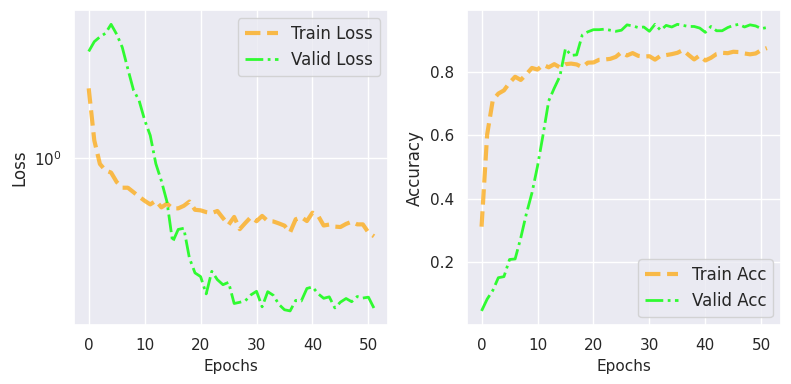

In [52]:
plot(history1)


# Strategy 2: User - User - Symptomp

In [129]:
from itertools import product
grouped = df.groupby(['Symptom_1', 'Symptom_2'])['index'].apply(list)
# Tạo danh sách các cặp chỉ số
pairs = []
for indices in grouped.values:
    pairs.extend(list(product(indices, repeat=2)))

# Tạo dataframe mới từ danh sách các cặp chỉ số
df_new2 = pd.DataFrame(pairs, columns=['index source', 'index target'])

df_new = pd.concat([df_new, df_new2], axis = 0)

graph_info_new = create_graph_info(df_new, df)

gnn_model_2 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="sum",
    combination_type="concat",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_2([1, 10, 100]))

Edges shape: (2, 2297726)
Nodes shape: (4920, 16)
GNN output shape: tf.Tensor(
[[0.03076059 0.02619335 0.02431512 0.02229076 0.02252753 0.0290672
  0.03192221 0.0159295  0.0287428  0.02347094 0.01608931 0.02614111
  0.02862142 0.02988488 0.0223078  0.01086794 0.02347028 0.03002437
  0.02286969 0.02368042 0.04386742 0.02745651 0.01519996 0.02232856
  0.01793146 0.02144726 0.02287562 0.01814845 0.03242369 0.01923092
  0.03430893 0.02040116 0.0292277  0.02812225 0.01868732 0.02276075
  0.01318165 0.024971   0.03118738 0.02189979 0.025165  ]
 [0.03021025 0.02954155 0.02207864 0.02566676 0.02294764 0.03069226
  0.02912614 0.01652013 0.02412677 0.02394073 0.01592711 0.0288745
  0.02884134 0.02452992 0.0218173  0.01185746 0.02544453 0.02715174
  0.02963899 0.02339747 0.04204105 0.02369451 0.01830015 0.02313844
  0.01956005 0.02235521 0.02162184 0.02016168 0.02985836 0.02104672
  0.03256148 0.02141327 0.0260436  0.02486301 0.02112106 0.02067794
  0.01377649 0.02526453 0.03357955 0.02032958 0.0

In [54]:
x_train = train.index.to_numpy()
history2 = run_experiment(gnn_model_2, x_train, train.Disease)

Epoch 1/300
14/14 [==============================] - 24s 822ms/step - loss: 2.7191 - acc: 0.2885 - val_loss: 3.3701 - val_acc: 0.1777
Epoch 2/300
14/14 [==============================] - 10s 737ms/step - loss: 1.3582 - acc: 0.5680 - val_loss: 3.6885 - val_acc: 0.1861
Epoch 3/300
14/14 [==============================] - 10s 738ms/step - loss: 0.9647 - acc: 0.7010 - val_loss: 4.2440 - val_acc: 0.1980
Epoch 4/300
14/14 [==============================] - 10s 738ms/step - loss: 0.8312 - acc: 0.7297 - val_loss: 4.1857 - val_acc: 0.1760
Epoch 5/300
14/14 [==============================] - 10s 723ms/step - loss: 0.7258 - acc: 0.7614 - val_loss: 5.4684 - val_acc: 0.1980
Epoch 6/300
14/14 [==============================] - 10s 722ms/step - loss: 0.6605 - acc: 0.7854 - val_loss: 4.8160 - val_acc: 0.1794
Epoch 7/300
14/14 [==============================] - 10s 734ms/step - loss: 0.6264 - acc: 0.8003 - val_loss: 4.0963 - val_acc: 0.2487
Epoch 8/300
14/14 [==============================] - 10s 722ms

In [55]:
y_pred = gnn_model_2.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 [==============================] - 6s 151ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.83      1.00      0.90        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        19
           4       1.00      0.90      0.95        29
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22
           7       1.00      0.96      0.98        28
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00   

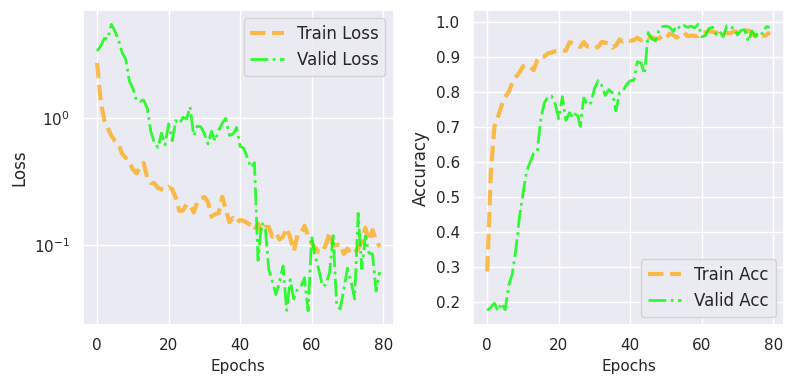

In [56]:
plot(history2)


# Graph Strategy 3: Xây dựng đồ thị dựa trên độ tương đồng giữa 2 người

In [130]:

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

df_test = train.iloc[:,2:].copy()
cosine_sim = cosine_similarity(df_test)

# Tạo DataFrame mới với cặp index thỏa điều kiện
indices = df['index'].tolist()
pairs = []
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim[i])):
        if cosine_sim[i, j] >= 0.99:
            pairs.append((indices[i], indices[j]))

df_pairs = pd.DataFrame(pairs, columns=['index source', 'index target'])
sampled_df = df_pairs.sample(frac=0.2, random_state=42)

In [131]:

graph_info_new = create_graph_info(sampled_df, df)

gnn_model_3 = GNNNodeClassifier(
    graph_info=graph_info_new,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="attention",
    combination_type="gru",
    name="gnn_model",
)

print("GNN output shape:", gnn_model_3([1, 10, 100]))

Edges shape: (2, 20799)
Nodes shape: (4920, 16)
GNN output shape: tf.Tensor(
[[0.03120873 0.03440292 0.01810458 0.01957289 0.02049132 0.02472931
  0.02299749 0.01859478 0.05177091 0.0253994  0.01717215 0.01986644
  0.04454018 0.02616059 0.02246551 0.01725275 0.02544158 0.02427963
  0.01673777 0.02193891 0.01322475 0.02258407 0.01769929 0.02602588
  0.02844235 0.021713   0.03379795 0.02536361 0.0254196  0.02277648
  0.01283162 0.01952056 0.02066773 0.03100589 0.02717036 0.0168696
  0.02553524 0.01831989 0.02474759 0.03053254 0.03262426]
 [0.03243917 0.04146352 0.0134796  0.01247565 0.02538369 0.02440189
  0.0245136  0.01417599 0.06501615 0.02156534 0.01998513 0.02798166
  0.03611496 0.02401629 0.02087255 0.01360001 0.02239676 0.01689081
  0.01561054 0.02265962 0.00989902 0.02717795 0.01467461 0.02254101
  0.03614836 0.01848625 0.02773085 0.02391586 0.03171607 0.02563648
  0.01236404 0.01996741 0.0248175  0.03239344 0.03686811 0.01813376
  0.02432437 0.0114912  0.02621931 0.02580509 0.03

In [59]:

x_train = train.index.to_numpy()
history3 = run_experiment(gnn_model_3, x_train, train.Disease)

Epoch 1/300
14/14 [==============================] - 14s 230ms/step - loss: 2.7788 - acc: 0.2706 - val_loss: 3.2778 - val_acc: 0.1371
Epoch 2/300
14/14 [==============================] - 2s 144ms/step - loss: 1.4161 - acc: 0.5868 - val_loss: 4.7747 - val_acc: 0.0592
Epoch 3/300
14/14 [==============================] - 2s 144ms/step - loss: 1.0769 - acc: 0.6487 - val_loss: 8.3825 - val_acc: 0.0660
Epoch 4/300
14/14 [==============================] - 2s 147ms/step - loss: 0.8859 - acc: 0.7208 - val_loss: 8.3401 - val_acc: 0.0931
Epoch 5/300
14/14 [==============================] - 2s 147ms/step - loss: 0.7582 - acc: 0.7498 - val_loss: 7.9653 - val_acc: 0.1134
Epoch 6/300
14/14 [==============================] - 2s 146ms/step - loss: 0.7342 - acc: 0.7599 - val_loss: 8.6610 - val_acc: 0.1032
Epoch 7/300
14/14 [==============================] - 2s 153ms/step - loss: 0.6445 - acc: 0.7913 - val_loss: 6.6905 - val_acc: 0.1252
Epoch 8/300
14/14 [==============================] - 2s 153ms/step -

In [60]:

y_pred = gnn_model_3.predict(test.index.to_numpy())
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 [==============================] - 2s 31ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.89      1.00      0.94        17
           4       1.00      0.84      0.91        31
           5       1.00      1.00      1.00        22
           6       0.95      0.91      0.93        23
           7       0.93      1.00      0.96        25
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       0.96      1.00      0.98        27
          14       1.00      0.95      0.98        22
          15       0.89      0.36      0.51        45
          16       1.00    

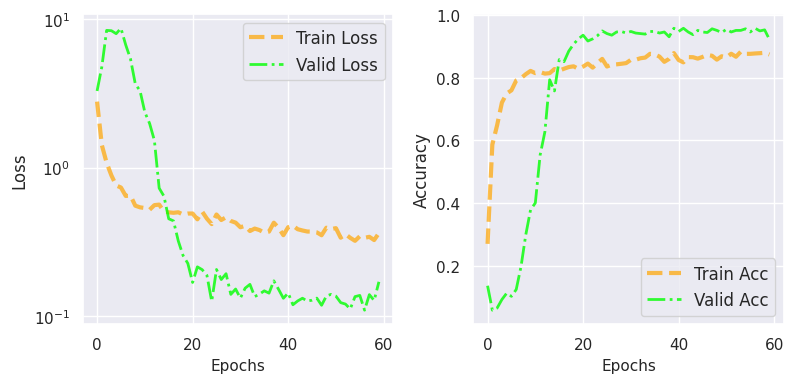

In [61]:
plot(history3)


# Graph Strategy 4: Many Graph Input

In [62]:

df_test = data.groupby('Disease').apply(lambda x: list(x[['Symptom_1', 'Symptom_2', 'Symptom_3']].stack().value_counts().nlargest(3).index))
df_test = df_test.to_frame(name = 'Symptom')
df_test.reset_index(inplace = True)
# Tạo DataFrame mới với các cột triệu chứng

df_new = df_test.explode('Symptom').reset_index(drop=True)

df_new.head(10)

,Disease,Symptom
0,0,vomiting
1,0,headache
2,0,nausea
3,1,high_fever
4,1,muscle_wasting
5,1,patches_in_throat
6,2,skin_rash
7,2,pus_filled_pimples
8,2,blackheads
9,3,vomiting


In [64]:

feature_disease = pd.read_csv('/content/disease_feature.csv').drop(columns='Unnamed: 0')
feature_disease.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3
0,0,vomiting,headache,nausea
1,1,high_fever,muscle_wasting,patches_in_throat
2,2,skin_rash,pus_filled_pimples,blackheads
3,3,vomiting,yellowish_skin,abdominal_pain
4,4,continuous_sneezing,shivering,chills
5,5,muscle_weakness,stiff_neck,swelling_joints
6,6,high_fever,fatigue,cough
7,7,neck_pain,back_pain,weakness_in_limbs
8,8,itching,skin_rash,fatigue
9,9,itching,vomiting,yellowish_skin


In [65]:

df_disease = feature_disease.replace(weights)
df_disease = df_disease.fillna(0) # put empty cell to 0
df_disease = df_disease.replace("foul_smell_of_urine" , 5)
df_disease = df_disease.replace("dischromic__patches" , 6)
df_disease = df_disease.replace("spotting__urination" , 6)
df_disease


,Disease,Symptom_1,Symptom_2,Symptom_3
0,0,5,3,5
1,1,7,3,6
2,2,3,2,2
3,3,5,3,4
4,4,4,5,3
5,5,2,4,5
6,6,7,4,4
7,7,5,3,7
8,8,1,3,4
9,9,1,5,3


In [73]:

# weight.reset_index(inplace = True)
graph_disease = create_group(['Symptom_1','Symptom_2'], feature_disease, 'Disease')
graph_disease


,index source,index target
0,34,37
1,29,36
2,8,14
3,8,15
4,14,15
5,9,28
6,21,22
7,21,40
8,22,40
9,0,32


In [74]:
data.reset_index(names = 'UserID', inplace = True)


In [75]:

# # weight.reset_index(inplace = True)
graph_user = pd.read_csv('/content/egde_user_user.csv')
graph_user

,index source,index target
0,2000,4013
1,2000,773
2,2000,362
3,2000,3685
4,2000,3644
...,...,...
187257,2643,4611
187258,2643,2561
187259,2244,4611
187260,2244,2561


In [67]:

def create_graph_info(df_edge, df_feature):
  # Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
  edges = df_edge.to_numpy().T
  # Create an edge weights array of ones.
  edge_weights = tf.ones(shape=edges.shape[1])
  # Create a node features array of shape [num_nodes, num_features].
  x = np.asarray(df_feature.values).astype('float32')
  node_features = tf.cast(
      x, dtype=tf.dtypes.float32
  )
  # Create graph info tuple with node_features, edges, and edge_weights.
  graph_info = (node_features, np.asarray(edges).astype('int32'), edge_weights)

  print("Edges shape:", edges.shape)
  print("Nodes shape:", node_features.shape)
  return graph_info

In [76]:

graph_info_user = create_graph_info(graph_user, df.iloc[:,2:])
graph_info_disease = create_graph_info(graph_disease, df_disease.iloc[:,1:])

Edges shape: (2, 187262)
Nodes shape: (4920, 17)
Edges shape: (2, 10)
Nodes shape: (41, 3)


In [77]:

class GNN_Multi_NodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info_user,
        graph_info_disease,
        num_classes,
        hidden_units,
        aggregation_type="mean",
        combination_type="gru",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features_user, edges_user, edge_weights_user = graph_info_user
        node_features_disease, edges_disease, edge_weights_disease = graph_info_disease

        self.node_features_user = node_features_user
        self.edges_user = edges_user
        self.edge_weights_user = edge_weights_user

        self.node_features_disease = node_features_disease
        self.edges_disease = edges_disease
        self.edge_weights_disease = edge_weights_disease

        # Set edge_weights to ones if not provided.
        if self.edge_weights_user is None:
            self.edge_weights_user = tf.ones(shape=edges_user.shape[1])

        # Set edge_weights to ones if not provided.
        if self.edge_weights_disease is None:
            self.edge_weights_disease = tf.ones(shape=edges_disease.shape[1])

        # Scale edge_weights to sum to 1.
        self.edge_weights_user = self.edge_weights_user / tf.math.reduce_sum(self.edge_weights_user)
        self.edge_weights_disease = self.edge_weights_disease / tf.math.reduce_sum(self.edge_weights_disease)

        # Create a process layer.
        self.preprocess_user = create_ffn(hidden_units, dropout_rate, name="preprocess")
        self.preprocess_disease = create_ffn(hidden_units, dropout_rate, name="preprocess")

        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes,activation = 'softmax', name="logits")

    def call(self, input):
        input_node_indices_user, input_node_indices_disease = input
        # Preprocess the node_features to produce node representations.
        x_user = self.preprocess_user(self.node_features_user)
        # Apply the first graph conv layer.
        x1_user = self.conv1((x_user, self.edges_user, self.edge_weights_user))
        # Skip connection.
        x_user = x1_user + x_user

        # Preprocess the node_features to produce node representations.
        x_disease = self.preprocess_disease(self.node_features_disease)
        # Apply the first graph conv layer.
        x1_disease = self.conv1((x_disease, self.edges_disease, self.edge_weights_disease))
        # Skip connection.
        x_disease = x1_disease + x_disease

        x_combined = tf.concat([x_user, x_disease], axis=0)

        # Apply the second graph conv layer.
        x_combined = self.conv2((x_combined, self.edges_user, self.edge_weights_user))

        # Postprocess node embedding.
        x_user = self.postprocess(x_combined)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x_user, input_node_indices_user)

        return self.compute_logits(node_embeddings)

In [78]:

gnn_model_3 = GNN_Multi_NodeClassifier(
    graph_info_user=graph_info_user,
    graph_info_disease=graph_info_disease,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    aggregation_type="mean",
    combination_type="gru",
    name="gnn_model",
)
gnn_model_3.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
print("GNN output shape:", gnn_model_3([[1, 10, 100], [1, 10, 100, 1000]]))
gnn_model_3.summary()

GNN output shape: tf.Tensor(
[[0.02541326 0.02539196 0.02479218 0.02433597 0.02779336 0.02531408
  0.02580343 0.02630659 0.02394101 0.02209983 0.02490297 0.02366586
  0.02456014 0.02462232 0.02233073 0.02290536 0.02507928 0.02391839
  0.02285303 0.02579444 0.02173447 0.02495515 0.0242587  0.0254044
  0.02517904 0.02320273 0.02567407 0.02433408 0.02596631 0.0236088
  0.02406109 0.02636751 0.0257694  0.02366663 0.02361338 0.02308871
  0.02138562 0.02354228 0.02320321 0.02542233 0.02373787]
 [0.02500275 0.02425103 0.02402576 0.02451815 0.02649696 0.02654129
  0.02484162 0.0243813  0.02570061 0.02312153 0.02380554 0.02407786
  0.025871   0.02422923 0.02241687 0.02468298 0.02483851 0.02337349
  0.02405476 0.02549342 0.02335691 0.02503962 0.02387599 0.02425868
  0.02374596 0.02543302 0.02600973 0.02399329 0.02486606 0.02345272
  0.02454801 0.0249333  0.02404485 0.02240009 0.02603182 0.02278462
  0.02257809 0.02413682 0.02401385 0.02459176 0.02418022]
 [0.02523909 0.02403124 0.02388542 0.0244

In [79]:
x_train_user = train.index.to_numpy()
x_train_disease = train.Disease.to_numpy()
history_multi = run_experiment(gnn_model_3, [x_train_user,x_train_disease], train.Disease)

Epoch 1/300
14/14 [==============================] - 16s 175ms/step - loss: 2.7150 - acc: 0.2960 - val_loss: 3.5966 - val_acc: 0.1929
Epoch 2/300
14/14 [==============================] - 1s 78ms/step - loss: 1.3132 - acc: 0.6102 - val_loss: 3.4442 - val_acc: 0.1049
Epoch 3/300
14/14 [==============================] - 1s 80ms/step - loss: 0.9616 - acc: 0.7034 - val_loss: 3.2805 - val_acc: 0.1168
Epoch 4/300
14/14 [==============================] - 1s 86ms/step - loss: 0.8194 - acc: 0.7534 - val_loss: 3.2084 - val_acc: 0.0761
Epoch 5/300
14/14 [==============================] - 1s 87ms/step - loss: 0.7746 - acc: 0.7698 - val_loss: 3.2542 - val_acc: 0.0795
Epoch 6/300
14/14 [==============================] - 1s 87ms/step - loss: 0.7432 - acc: 0.7785 - val_loss: 3.1527 - val_acc: 0.1675
Epoch 7/300
14/14 [==============================] - 1s 87ms/step - loss: 0.6856 - acc: 0.7886 - val_loss: 2.7508 - val_acc: 0.2200
Epoch 8/300
14/14 [==============================] - 1s 78ms/step - loss: 

In [80]:

y_pred = gnn_model_3.predict([test.index.to_numpy(), test.Disease.to_numpy()])
print(classification_report(np.argmax(y_pred, axis = 1), test.Disease))

31/31 [==============================] - 2s 17ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23
           3       0.89      1.00      0.94        17
           4       1.00      0.87      0.93        30
           5       1.00      1.00      1.00        22
           6       0.95      0.91      0.93        23
           7       0.93      1.00      0.96        25
           8       0.90      1.00      0.95        18
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        21
          15       0.83      1.00      0.91        15
          16       1.00    

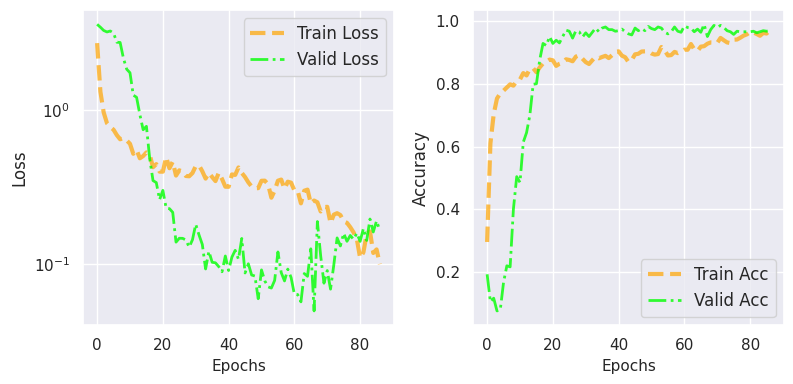

In [81]:
plot(history_multi)


In [134]:
del gnn_model_3

# Graph Strategy Multi-Head Attention